In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.16.1


In [3]:
df = pd.read_csv('C:\\Users\\Amuthan\\Desktop\\Detection of diabetic retinopathy\\DR\\train.csv')

diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}

diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

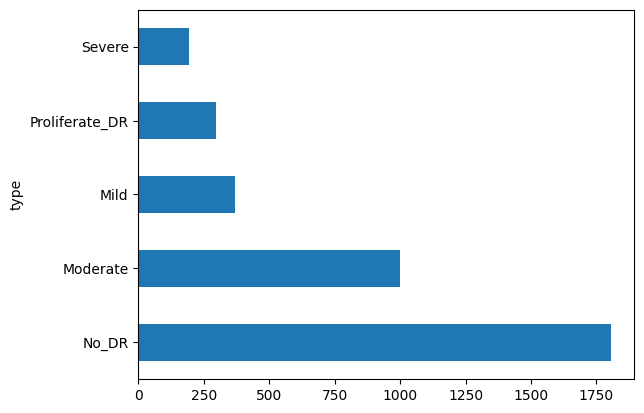

In [4]:
df['type'].value_counts().plot(kind='barh')


In [5]:

train_a, val = train_test_split(df, test_size = 0.2, stratify = df['type'])
train, test = train_test_split(train_a, test_size = 0.2, stratify = train_a['type'])

print("For Training Dataset :")
print(train['type'].value_counts(), '\n')
print("For Testing Dataset :")
print(test['type'].value_counts(), '\n')
print("For Validation Dataset :")
print(val['type'].value_counts(), '\n')



For Training Dataset :
type
No_DR             1155
Moderate           639
Mild               237
Proliferate_DR     189
Severe             123
Name: count, dtype: int64 

For Testing Dataset :
type
No_DR             289
Moderate          160
Mild               59
Proliferate_DR     47
Severe             31
Name: count, dtype: int64 

For Validation Dataset :
type
No_DR             361
Moderate          200
Mild               74
Proliferate_DR     59
Severe             39
Name: count, dtype: int64 



In [6]:


base_dir = ''

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

In [19]:
src_dir = 'C:\\Users\\Amuthan\\Desktop\\Detection of diabetic retinopathy\\DR\\gaussian_filtered_images'
for index,row in train.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(train_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(val_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in test.iterrows():
    diagnosis = row['type']
    binary_diagnosis = row['binary_type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(src_dir, diagnosis, id_code)
    dstfile = os.path.join(test_dir, binary_diagnosis)
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Amuthan\\Desktop\\Detection of diabetic retinopathy\\DR\\gaussian_filtered_images\\No_DR\\c9e697117f3f.png'

In [ ]:
train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path, target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, target_size=(224,224), shuffle = False)

Found 0 images belonging to 1 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(2, activation = 'softmax')
])

c:\Users\Amuthan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches,
                    epochs=20,
                    validation_data=val_batches)

Epoch 1/20
74/74 [==============================] - 18s 134ms/step - loss: 0.5201 - accuracy: 0.7785 - val_loss: 0.7568 - val_accuracy: 0.5075
Epoch 2/20
74/74 [==============================] - 9s 123ms/step - loss: 0.3386 - accuracy: 0.8694 - val_loss: 0.9167 - val_accuracy: 0.5075
Epoch 3/20
74/74 [==============================] - 9s 119ms/step - loss: 0.2995 - accuracy: 0.8809 - val_loss: 0.9935 - val_accuracy: 0.5075
Epoch 4/20
74/74 [==============================] - 9s 125ms/step - loss: 0.2677 - accuracy: 0.8916 - val_loss: 0.9669 - val_accuracy: 0.5075
Epoch 5/20
74/74 [==============================] - 9s 124ms/step - loss: 0.2515 - accuracy: 0.9065 - val_loss: 0.9212 - val_accuracy: 0.5321
Epoch 6/20
74/74 [==============================] - 9s 117ms/step - loss: 0.2374 - accuracy: 0.9108 - val_loss: 0.6645 - val_accuracy: 0.6030
Epoch 7/20
74/74 [==============================] - 10s 134ms/step - loss: 0.2290 - accuracy: 0.9159 - val_loss: 0.3825 - val_accuracy: 0.8117
Epoc

In [ ]:
model.save('n_model.h5')

In [ ]:


loss, acc = model.evaluate(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)



ValueError: Must provide at least one structure

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    new_model = tf.keras.models.load_model("n_model.h5")
    predict=new_model.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    if per==1:
        print('Diabetic Retinopathy Not Detected')
    else:
        print('Diabetic Retinopathy Detected')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Diabetic Retinopathy Detected


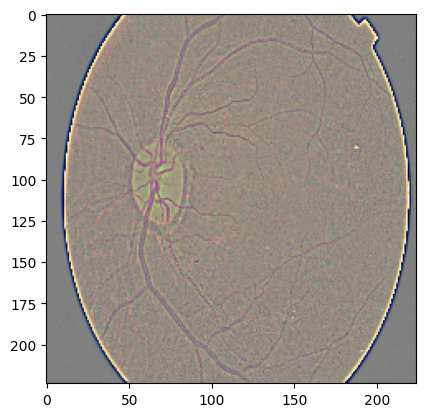

In [ ]:
predict_class('C:\\Users\\Amuthan\\Desktop\\Detection of diabetic retinopathy\\DR\\gaussian_filtered_images\\gaussian_filtered_images\\Mild\\0a61bddab956.png')